**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
FOLDERS_ANT  = c(
    "annotation_enhancer_zscore_junke",
    "annotation_enhancer_merge",
    "annotation_crispri_growth",
    "annotation_crispri_e2g",
    "KS91_K562_ASTARRseq_peak_macs_input"
)

FOLDERS_LOOP = c(
    "hic_intact_ENCSR479XDG",
    "hic_intact_deep"
)

In [3]:
for (folder_ant in FOLDERS_ANT){
    cat(folder_ant, "\n")
    fdiry  = file.path(FD_RES, "results", "region", folder_ant)
    fname  = "*.bed.gz"
    fglob  = file.path(fdiry, fname)
    fpaths = Sys.glob(fglob)
    fnames = basename(fpaths)
    print(fnames)
    cat("\n")
}

annotation_enhancer_zscore_junke 
 [1] "enhancer_zscore_junke.peak.ASTARR_AB.bed.gz"
 [2] "enhancer_zscore_junke.peak.ASTARR_A.bed.gz" 
 [3] "enhancer_zscore_junke.peak.ASTARR_R.bed.gz" 
 [4] "enhancer_zscore_junke.peak.LMPRA_AB.bed.gz" 
 [5] "enhancer_zscore_junke.peak.LMPRA_A.bed.gz"  
 [6] "enhancer_zscore_junke.peak.LMPRA_R.bed.gz"  
 [7] "enhancer_zscore_junke.peak.TMPRA_A.bed.gz"  
 [8] "enhancer_zscore_junke.peak.TMPRA_R.bed.gz"  
 [9] "enhancer_zscore_junke.peak.WSTARR_AB.bed.gz"
[10] "enhancer_zscore_junke.peak.WSTARR_A.bed.gz" 
[11] "enhancer_zscore_junke.peak.WSTARR_R.bed.gz" 

annotation_enhancer_merge 
 [1] "enhancer_merge.concat.crispri.bed.gz"               
 [2] "enhancer_merge.concat.crispri_hcrff.bed.gz"         
 [3] "enhancer_merge.concat.starrmpra.bed.gz"             
 [4] "enhancer_merge.concat.starrmpra_crispri_atac.bed.gz"
 [5] "enhancer_merge.concat.starrmpra_crispri.bed.gz"     
 [6] "enhancer_merge.region.crispri.bed.gz"               
 [7] "enhancer_merge.re

In [4]:
folder_loop = FOLDERS_LOOP[1]
for (folder_ant in FOLDERS_ANT){
    cat(folder_ant, "\n")
    fdiry = file.path(FD_RES, "results", "region", folder_loop, "loop", folder_ant)
    fname  = "*.bed.gz"
    fglob  = file.path(fdiry, fname)
    fpaths = Sys.glob(fglob)
    fnames = basename(fpaths)
    print(fnames)
    cat("\n")
}

annotation_enhancer_zscore_junke 
 [1] "loopA.annotation.enhancer_zscore_junke.peak.ASTARR_AB.bed.gz"
 [2] "loopA.annotation.enhancer_zscore_junke.peak.ASTARR_A.bed.gz" 
 [3] "loopA.annotation.enhancer_zscore_junke.peak.ASTARR_R.bed.gz" 
 [4] "loopA.annotation.enhancer_zscore_junke.peak.LMPRA_AB.bed.gz" 
 [5] "loopA.annotation.enhancer_zscore_junke.peak.LMPRA_A.bed.gz"  
 [6] "loopA.annotation.enhancer_zscore_junke.peak.LMPRA_R.bed.gz"  
 [7] "loopA.annotation.enhancer_zscore_junke.peak.TMPRA_A.bed.gz"  
 [8] "loopA.annotation.enhancer_zscore_junke.peak.TMPRA_R.bed.gz"  
 [9] "loopA.annotation.enhancer_zscore_junke.peak.WSTARR_AB.bed.gz"
[10] "loopA.annotation.enhancer_zscore_junke.peak.WSTARR_A.bed.gz" 
[11] "loopA.annotation.enhancer_zscore_junke.peak.WSTARR_R.bed.gz" 
[12] "loopB.annotation.enhancer_zscore_junke.peak.ASTARR_AB.bed.gz"
[13] "loopB.annotation.enhancer_zscore_junke.peak.ASTARR_A.bed.gz" 
[14] "loopB.annotation.enhancer_zscore_junke.peak.ASTARR_R.bed.gz" 
[15] "loopB.an

## Enhancer ZScore Junke

In [5]:
FOLDER_ANT  = FOLDERS_ANT[1]
print(FOLDER_ANT)

[1] "annotation_enhancer_zscore_junke"


In [6]:
## import annotation description file
fdiry  = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "description.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)
cnames = dat$Name
cat(FOLDER_ANT, "\n")
print(cnames)
cat("\n")

### get file path of annotation file
fdiry = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "*.bed.gz"
fglob = file.path(fdiry, fname)
fpaths_ant = Sys.glob(fglob)
print(fpaths_ant)
cat("\n")

annotation_enhancer_zscore_junke 
[1] "Chrom"       "Start"       "End"         "Name"        "Score"      
[6] "Strand"      "Assay_Type"  "Assay_Label" "Dataset"    

 [1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_zscore_junke/enhancer_zscore_junke.peak.ASTARR_AB.bed.gz"
 [2] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_zscore_junke/enhancer_zscore_junke.peak.ASTARR_A.bed.gz" 
 [3] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_zscore_junke/enhancer_zscore_junke.peak.ASTARR_R.bed.gz" 
 [4] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_zscore_junke/enhancer_zscore_junke.peak.LMPRA_AB.bed.gz" 
 [5] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_zscore_junke/enhancer_zscore_junke.peak.LMPRA_A.bed.gz"  
 [6] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotatio

In [7]:
###
lst = lapply(fpaths_ant, function(fpath_ant){
    ### init
    fname_ant = basename(fpath_ant)
    
    ### import annotation file
    dat_ant = read_tsv(fpath_ant, col_names = cnames, show_col_types = FALSE)
    dat_ant = dat_ant %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))
    
    lst = lapply(FOLDERS_LOOP, function(FOLDER_LOOP){
        
        ### get file path for corresponding loop annotation
        fdiry = file.path(FD_RES, "results", "region", FOLDER_LOOP, "loop", FOLDER_ANT)
        fname = paste0("*", fname_ant)
        fglob = file.path(fdiry, fname)
        fpaths_loop = Sys.glob(fglob)
        fnames_loop = basename(fpaths_loop)
        
        ### import loop file (loop_A and loop_B)
        vec = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")
        lst = lapply(fpaths_loop, function(fpath_loop){
            dat = read_tsv(fpath_loop, col_names = vec, show_col_types = FALSE)
            dat = dat %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))
            return(dat)
        })
        dat_loop = bind_rows(lst)
        
        ### calculate how many region in annotation file are in the loop file
        vec_ant_total = unique(dat_ant$Region)
        vec_ant_loop  = unique(dat_loop$Region)
        vec = vec_ant_total %in% vec_ant_loop
        dat = data.frame(
            "HiC"           = FOLDER_LOOP,
            "Annotation"    = fname_ant,
            "Region_Total"  = length(vec_ant_total), 
            "Region_Looped" = length(vec_ant_loop), 
            "Check"         = sum(vec), 
            "Freq"          = mean(vec)
        )
        return(dat)
    })
    
    ### combine results from different Hi-C loop file
    dat = bind_rows(lst)
    return(dat)
})

### combine results from different annotation file
dat = bind_rows(lst)

### assign and show
dat_annot_looped_freq_enhancer_zscore = dat
print(dim(dat))
dat

[1] 22  6


HiC,Annotation,Region_Total,Region_Looped,Check,Freq
<chr>,<chr>,<int>,<int>,<int>,<dbl>
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.ASTARR_AB.bed.gz,3123,1455,1455,0.46589817
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_AB.bed.gz,3123,2012,2012,0.64425232
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.ASTARR_A.bed.gz,9368,4277,4277,0.45655423
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_A.bed.gz,9368,5869,5869,0.62649445
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.ASTARR_R.bed.gz,17897,8808,8808,0.49214952
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_R.bed.gz,17897,11566,11566,0.64625356
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.LMPRA_AB.bed.gz,26732,9854,9854,0.36862188
hic_intact_deep,enhancer_zscore_junke.peak.LMPRA_AB.bed.gz,26732,13718,13718,0.51316774
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.LMPRA_A.bed.gz,40096,14869,14869,0.37083500


## Enhancer merged

In [8]:
FOLDER_ANT  = FOLDERS_ANT[2]
print(FOLDER_ANT)

[1] "annotation_enhancer_merge"


In [9]:
## import annotation description file
fdiry  = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "description.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)
cnames = dat$Name
cat(FOLDER_ANT, "\n")
print(cnames)
cat("\n")

### get file path of annotation file
fdiry = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "*region*.bed.gz"
fglob = file.path(fdiry, fname)
fpaths_ant = Sys.glob(fglob)
print(fpaths_ant)
cat("\n")

annotation_enhancer_merge 
[1] "Chrom"       "Start"       "End"         "Assay_Type"  "Assay_Label"

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_merge/enhancer_merge.region.crispri.bed.gz"               
[2] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_merge/enhancer_merge.region.crispri_hcrff.bed.gz"         
[3] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_merge/enhancer_merge.region.starrmpra.bed.gz"             
[4] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_merge/enhancer_merge.region.starrmpra_crispri_atac.bed.gz"
[5] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_enhancer_merge/enhancer_merge.region.starrmpra_crispri.bed.gz"     



In [10]:
###
lst = lapply(fpaths_ant, function(fpath_ant){
    ### init
    fname_ant = basename(fpath_ant)
    
    ### import annotation file
    dat_ant = read_tsv(fpath_ant, col_names = cnames, show_col_types = FALSE)
    dat_ant = dat_ant %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))
    
    lst = lapply(FOLDERS_LOOP, function(FOLDER_LOOP){
        
        ### get file path for corresponding loop annotation
        fdiry = file.path(FD_RES, "results", "region", FOLDER_LOOP, "loop", FOLDER_ANT)
        fname = paste0("*", fname_ant)
        fglob = file.path(fdiry, fname)
        fpaths_loop = Sys.glob(fglob)
        fnames_loop = basename(fpaths_loop)
        
        ### import loop file (loop_A and loop_B)
        vec = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")
        lst = lapply(fpaths_loop, function(fpath_loop){
            dat = read_tsv(fpath_loop, col_names = vec, show_col_types = FALSE)
            dat = dat %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))
            return(dat)
        })
        dat_loop = bind_rows(lst)
        
        ### calculate how many region in annotation file are in the loop file
        vec_ant_total = unique(dat_ant$Region)
        vec_ant_loop  = unique(dat_loop$Region)
        vec = vec_ant_total %in% vec_ant_loop
        dat = data.frame(
            "HiC"           = FOLDER_LOOP,
            "Annotation"    = fname_ant,
            "Region_Total"  = length(vec_ant_total), 
            "Region_Looped" = length(vec_ant_loop), 
            "Check"         = sum(vec), 
            "Freq"          = mean(vec)
        )
        return(dat)
    })
    
    ### combine results from different Hi-C loop file
    dat = bind_rows(lst)
    return(dat)
})

### combine results from different annotation file
dat = bind_rows(lst)

### assign and show
dat_annot_looped_freq_enhancer_merge = dat
print(dim(dat))
dat

Warning message:
“Unknown or uninitialised column: `Region`.”
Warning message:
“Unknown or uninitialised column: `Region`.”
Warning message:
“Unknown or uninitialised column: `Region`.”
Warning message:
“Unknown or uninitialised column: `Region`.”


[1] 10  6


HiC,Annotation,Region_Total,Region_Looped,Check,Freq
<chr>,<chr>,<int>,<int>,<int>,<dbl>
hic_intact_ENCSR479XDG,enhancer_merge.region.crispri.bed.gz,6670,2487,2487,0.3728636
hic_intact_deep,enhancer_merge.region.crispri.bed.gz,6670,3208,3208,0.4809595
hic_intact_ENCSR479XDG,enhancer_merge.region.crispri_hcrff.bed.gz,80,46,46,0.5750000
hic_intact_deep,enhancer_merge.region.crispri_hcrff.bed.gz,80,54,54,0.6750000
hic_intact_ENCSR479XDG,enhancer_merge.region.starrmpra.bed.gz,184541,38009,38009,0.2059651
hic_intact_deep,enhancer_merge.region.starrmpra.bed.gz,184541,47574,47574,0.2577964
hic_intact_ENCSR479XDG,enhancer_merge.region.starrmpra_crispri_atac.bed.gz,350813,0,0,0.0000000
hic_intact_deep,enhancer_merge.region.starrmpra_crispri_atac.bed.gz,350813,0,0,0.0000000
hic_intact_ENCSR479XDG,enhancer_merge.region.starrmpra_crispri.bed.gz,186745,0,0,0.0000000


## CRISPRi-Growth

In [11]:
FOLDER_ANT  = FOLDERS_ANT[3]
print(FOLDER_ANT)

[1] "annotation_crispri_growth"


In [12]:
## import annotation description file
fdiry  = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "description.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)
cnames = dat$Name
cat(FOLDER_ANT, "\n")
print(cnames)
cat("\n")

### get file path of annotation file
fdiry = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "*.bed.gz"
fglob = file.path(fdiry, fname)
fpath_ant = Sys.glob(fglob)
print(fpath_ant)
cat("\n")

annotation_crispri_growth 
[1] "Chrom"       "Start"       "End"         "Name"        "Log2FC"     
[6] "Padj"        "Assay_Type"  "Assay_Label"

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_crispri_growth/crispri_growth_dhs.bed.gz"



In [13]:
### init
fname_ant = basename(fpath_ant)

### import annotation file
dat_ant = read_tsv(fpath_ant, col_names = cnames, show_col_types = FALSE)
dat_ant = dat_ant %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))

lst = lapply(FOLDERS_LOOP, function(FOLDER_LOOP){

    ### get file path for corresponding loop annotation
    fdiry = file.path(FD_RES, "results", "region", FOLDER_LOOP, "loop", FOLDER_ANT)
    fname = paste0("*", fname_ant)
    fglob = file.path(fdiry, fname)
    fpaths_loop = Sys.glob(fglob)
    fnames_loop = basename(fpaths_loop)

    ### import loop file (loop_A and loop_B)
    vec = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")
    lst = lapply(fpaths_loop, function(fpath_loop){
        dat = read_tsv(fpath_loop, col_names = vec, show_col_types = FALSE)
        dat = dat %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))
        return(dat)
    })
    dat_loop = bind_rows(lst)

    ### calculate how many region in annotation file are in the loop file
    vec_ant_total = unique(dat_ant$Region)
    vec_ant_loop  = unique(dat_loop$Region)
    vec = vec_ant_total %in% vec_ant_loop
    dat = data.frame(
        "HiC"           = FOLDER_LOOP,
        "Annotation"    = fname_ant,
        "Region_Total"  = length(vec_ant_total), 
        "Region_Looped" = length(vec_ant_loop), 
        "Check"         = sum(vec), 
        "Freq"          = mean(vec)
    )
    return(dat)
})

### combine results from different annotation file
dat = bind_rows(lst)

### assign and show
dat_annot_looped_freq_crispri_growth = dat
print(dim(dat))
dat

[1] 2 6


HiC,Annotation,Region_Total,Region_Looped,Check,Freq
<chr>,<chr>,<int>,<int>,<int>,<dbl>
hic_intact_ENCSR479XDG,crispri_growth_dhs.bed.gz,6242,2257,2257,0.3615828
hic_intact_deep,crispri_growth_dhs.bed.gz,6242,2902,2902,0.4649151


## CRISPRi-E2G

In [14]:
FOLDER_ANT  = FOLDERS_ANT[4]
print(FOLDER_ANT)

[1] "annotation_crispri_e2g"


In [15]:
## import annotation description file
fdiry  = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "description.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)
cnames = dat$Name
cat(FOLDER_ANT, "\n")
print(cnames)
cat("\n")

### get file path of annotation file
fdiry = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "*.bed.gz"
fglob = file.path(fdiry, fname)
fpath_ant = Sys.glob(fglob)
print(fpath_ant)
cat("\n")

annotation_crispri_e2g 
 [1] "Chrom"       "Start"       "End"         "Name"        "Score"      
 [6] "Gene_Symbol" "Gene_TSS"    "Reference"   "Assay_Type"  "Assay_Label"

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/annotation_crispri_e2g/crispri_e2g_region.bed.gz"



In [16]:
### init
fname_ant = basename(fpath_ant)

### import annotation file
dat_ant = read_tsv(fpath_ant, col_names = cnames, show_col_types = FALSE)
dat_ant = dat_ant %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))

lst = lapply(FOLDERS_LOOP, function(FOLDER_LOOP){

    ### get file path for corresponding loop annotation
    fdiry = file.path(FD_RES, "results", "region", FOLDER_LOOP, "loop", FOLDER_ANT)
    fname = paste0("*", fname_ant)
    fglob = file.path(fdiry, fname)
    fpaths_loop = Sys.glob(fglob)
    fnames_loop = basename(fpaths_loop)

    ### import loop file (loop_A and loop_B)
    vec = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")
    lst = lapply(fpaths_loop, function(fpath_loop){
        dat = read_tsv(fpath_loop, col_names = vec, show_col_types = FALSE)
        dat = dat %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))
        return(dat)
    })
    dat_loop = bind_rows(lst)

    ### calculate how many region in annotation file are in the loop file
    vec_ant_total = unique(dat_ant$Region)
    vec_ant_loop  = unique(dat_loop$Region)
    vec = vec_ant_total %in% vec_ant_loop
    dat = data.frame(
        "HiC"           = FOLDER_LOOP,
        "Annotation"    = fname_ant,
        "Region_Total"  = length(vec_ant_total), 
        "Region_Looped" = length(vec_ant_loop), 
        "Check"         = sum(vec), 
        "Freq"          = mean(vec)
    )
    return(dat)
})

### combine results from different annotation file
dat = bind_rows(lst)

### assign and show
dat_annot_looped_freq_crispri_e2g = dat
print(dim(dat))
dat

[1] 2 6


HiC,Annotation,Region_Total,Region_Looped,Check,Freq
<chr>,<chr>,<int>,<int>,<int>,<dbl>
hic_intact_ENCSR479XDG,crispri_e2g_region.bed.gz,413,230,230,0.5569007
hic_intact_deep,crispri_e2g_region.bed.gz,413,304,304,0.7360775


## OCR

In [17]:
FOLDER_ANT  = FOLDERS_ANT[5]
print(FOLDER_ANT)

[1] "KS91_K562_ASTARRseq_peak_macs_input"


In [18]:
## import annotation description file
fdiry  = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "description.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath, show_col_types = FALSE)
cnames = dat$Name
cat(FOLDER_ANT, "\n")
print(cnames)
cat("\n")

### get file path of annotation file
fdiry = file.path(FD_RES, "results", "region", FOLDER_ANT)
fname = "*.bed.gz"
fglob = file.path(fdiry, fname)
fpath_ant = Sys.glob(fglob)
print(fpath_ant)
cat("\n")

KS91_K562_ASTARRseq_peak_macs_input 
[1] "Chrom" "Start" "End"  

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/KS91_K562_ASTARRseq_peak_macs_input/KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz"



In [19]:
### init
fname_ant = basename(fpath_ant)

### import annotation file
dat_ant = read_tsv(fpath_ant, col_names = cnames, show_col_types = FALSE)
dat_ant = dat_ant %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))

lst = lapply(FOLDERS_LOOP, function(FOLDER_LOOP){

    ### get file path for corresponding loop annotation
    fdiry = file.path(FD_RES, "results", "region", FOLDER_LOOP, "loop", FOLDER_ANT)
    fname = paste0("*", fname_ant)
    fglob = file.path(fdiry, fname)
    fpaths_loop = Sys.glob(fglob)
    fnames_loop = basename(fpaths_loop)

    ### import loop file (loop_A and loop_B)
    vec = c("Chrom_Loop", "Start_Loop", "End_Loop", cnames, "Overlap")
    lst = lapply(fpaths_loop, function(fpath_loop){
        dat = read_tsv(fpath_loop, col_names = vec, show_col_types = FALSE)
        dat = dat %>% dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End))
        return(dat)
    })
    dat_loop = bind_rows(lst)

    ### calculate how many region in annotation file are in the loop file
    vec_ant_total = unique(dat_ant$Region)
    vec_ant_loop  = unique(dat_loop$Region)
    vec = vec_ant_total %in% vec_ant_loop
    dat = data.frame(
        "HiC"           = FOLDER_LOOP,
        "Annotation"    = fname_ant,
        "Region_Total"  = length(vec_ant_total), 
        "Region_Looped" = length(vec_ant_loop), 
        "Check"         = sum(vec), 
        "Freq"          = mean(vec)
    )
    return(dat)
})

### combine results from different annotation file
dat = bind_rows(lst)

### assign and show
dat_annot_looped_freq_ocr = dat
print(dim(dat))
dat

[1] 2 6


HiC,Annotation,Region_Total,Region_Looped,Check,Freq
<chr>,<chr>,<int>,<int>,<int>,<dbl>
hic_intact_ENCSR479XDG,KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz,247520,46527,46527,0.1879727
hic_intact_deep,KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz,247520,55551,55551,0.2244303


## Arrange

In [20]:
dat = dat_annot_looped_freq_enhancer_zscore
dat$Assay = dat$Annot %>% 
    str_split(., "\\.") %>%
    do.call(rbind, .) %>%
    as.data.frame %>%
    dplyr::pull(3)

dat  = dat %>% dplyr::mutate(Label = paste0(Assay, "\n(", Region_Total, ")"))
dat1 = dat
dat

HiC,Annotation,Region_Total,Region_Looped,Check,Freq,Assay,Label
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.ASTARR_AB.bed.gz,3123,1455,1455,0.46589817,ASTARR_AB,ASTARR_AB (3123)
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_AB.bed.gz,3123,2012,2012,0.64425232,ASTARR_AB,ASTARR_AB (3123)
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.ASTARR_A.bed.gz,9368,4277,4277,0.45655423,ASTARR_A,ASTARR_A (9368)
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_A.bed.gz,9368,5869,5869,0.62649445,ASTARR_A,ASTARR_A (9368)
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.ASTARR_R.bed.gz,17897,8808,8808,0.49214952,ASTARR_R,ASTARR_R (17897)
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_R.bed.gz,17897,11566,11566,0.64625356,ASTARR_R,ASTARR_R (17897)
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.LMPRA_AB.bed.gz,26732,9854,9854,0.36862188,LMPRA_AB,LMPRA_AB (26732)
hic_intact_deep,enhancer_zscore_junke.peak.LMPRA_AB.bed.gz,26732,13718,13718,0.51316774,LMPRA_AB,LMPRA_AB (26732)
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.LMPRA_A.bed.gz,40096,14869,14869,0.37083500,LMPRA_A,LMPRA_A (40096)


In [21]:
dat = dat_annot_looped_freq_crispri_growth
dat$Assay = "CRISPRi_Growth"
dat  = dat %>% dplyr::mutate(Label = paste0(Assay, "\n(", Region_Total, ")"))
dat2 = dat
dat

HiC,Annotation,Region_Total,Region_Looped,Check,Freq,Assay,Label
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
hic_intact_ENCSR479XDG,crispri_growth_dhs.bed.gz,6242,2257,2257,0.3615828,CRISPRi_Growth,CRISPRi_Growth (6242)
hic_intact_deep,crispri_growth_dhs.bed.gz,6242,2902,2902,0.4649151,CRISPRi_Growth,CRISPRi_Growth (6242)


In [22]:
dat = dat_annot_looped_freq_crispri_e2g
dat$Assay = "CRISPRi_E2G"
dat  = dat %>% dplyr::mutate(Label = paste0(Assay, "\n(", Region_Total, ")"))
dat3 = dat
dat

HiC,Annotation,Region_Total,Region_Looped,Check,Freq,Assay,Label
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
hic_intact_ENCSR479XDG,crispri_e2g_region.bed.gz,413,230,230,0.5569007,CRISPRi_E2G,CRISPRi_E2G (413)
hic_intact_deep,crispri_e2g_region.bed.gz,413,304,304,0.7360775,CRISPRi_E2G,CRISPRi_E2G (413)


In [23]:
dat = dat_annot_looped_freq_enhancer_merge
dat$Assay = dat$Annot %>% 
    str_split(., "\\.") %>%
    do.call(rbind, .) %>%
    as.data.frame %>%
    dplyr::pull(3)
dat = dat %>% dplyr::mutate(
    Assay = recode(
        Assay, 
        'crispri'       = 'CRISPRi', 
        'crispri_hcrff' = 'CRISPRi_HCRFF', 
        'starrmpra'     = 'STARRMPRA')
)
dat  = dat %>% dplyr::mutate(Label = paste0(Assay, "\n(", Region_Total, ")"))
dat4 = dat
dat

HiC,Annotation,Region_Total,Region_Looped,Check,Freq,Assay,Label
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
hic_intact_ENCSR479XDG,enhancer_merge.region.crispri.bed.gz,6670,2487,2487,0.3728636,CRISPRi,CRISPRi (6670)
hic_intact_deep,enhancer_merge.region.crispri.bed.gz,6670,3208,3208,0.4809595,CRISPRi,CRISPRi (6670)
hic_intact_ENCSR479XDG,enhancer_merge.region.crispri_hcrff.bed.gz,80,46,46,0.5750000,CRISPRi_HCRFF,CRISPRi_HCRFF (80)
hic_intact_deep,enhancer_merge.region.crispri_hcrff.bed.gz,80,54,54,0.6750000,CRISPRi_HCRFF,CRISPRi_HCRFF (80)
hic_intact_ENCSR479XDG,enhancer_merge.region.starrmpra.bed.gz,184541,38009,38009,0.2059651,STARRMPRA,STARRMPRA (184541)
hic_intact_deep,enhancer_merge.region.starrmpra.bed.gz,184541,47574,47574,0.2577964,STARRMPRA,STARRMPRA (184541)
hic_intact_ENCSR479XDG,enhancer_merge.region.starrmpra_crispri_atac.bed.gz,350813,0,0,0.0000000,starrmpra_crispri_atac,starrmpra_crispri_atac (350813)
hic_intact_deep,enhancer_merge.region.starrmpra_crispri_atac.bed.gz,350813,0,0,0.0000000,starrmpra_crispri_atac,starrmpra_crispri_atac (350813)
hic_intact_ENCSR479XDG,enhancer_merge.region.starrmpra_crispri.bed.gz,186745,0,0,0.0000000,starrmpra_crispri,starrmpra_crispri (186745)


In [24]:
dat = dat_annot_looped_freq_ocr
dat$Assay = "OCR"
dat  = dat %>% dplyr::mutate(Label = paste0(Assay, "\n(", Region_Total, ")"))
dat5 = dat
dat

HiC,Annotation,Region_Total,Region_Looped,Check,Freq,Assay,Label
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
hic_intact_ENCSR479XDG,KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz,247520,46527,46527,0.1879727,OCR,OCR (247520)
hic_intact_deep,KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz,247520,55551,55551,0.2244303,OCR,OCR (247520)


In [25]:
dat = bind_rows(dat1, dat2, dat3, dat4, dat5)
lab = unique(dat$Label)
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=lab))
dat_merge = dat
dat

HiC,Annotation,Region_Total,Region_Looped,Check,Freq,Assay,Label
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<fct>
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.ASTARR_AB.bed.gz,3123,1455,1455,0.46589817,ASTARR_AB,ASTARR_AB (3123)
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_AB.bed.gz,3123,2012,2012,0.64425232,ASTARR_AB,ASTARR_AB (3123)
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.ASTARR_A.bed.gz,9368,4277,4277,0.45655423,ASTARR_A,ASTARR_A (9368)
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_A.bed.gz,9368,5869,5869,0.62649445,ASTARR_A,ASTARR_A (9368)
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.ASTARR_R.bed.gz,17897,8808,8808,0.49214952,ASTARR_R,ASTARR_R (17897)
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_R.bed.gz,17897,11566,11566,0.64625356,ASTARR_R,ASTARR_R (17897)
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.LMPRA_AB.bed.gz,26732,9854,9854,0.36862188,LMPRA_AB,LMPRA_AB (26732)
hic_intact_deep,enhancer_zscore_junke.peak.LMPRA_AB.bed.gz,26732,13718,13718,0.51316774,LMPRA_AB,LMPRA_AB (26732)
hic_intact_ENCSR479XDG,enhancer_zscore_junke.peak.LMPRA_A.bed.gz,40096,14869,14869,0.37083500,LMPRA_A,LMPRA_A (40096)


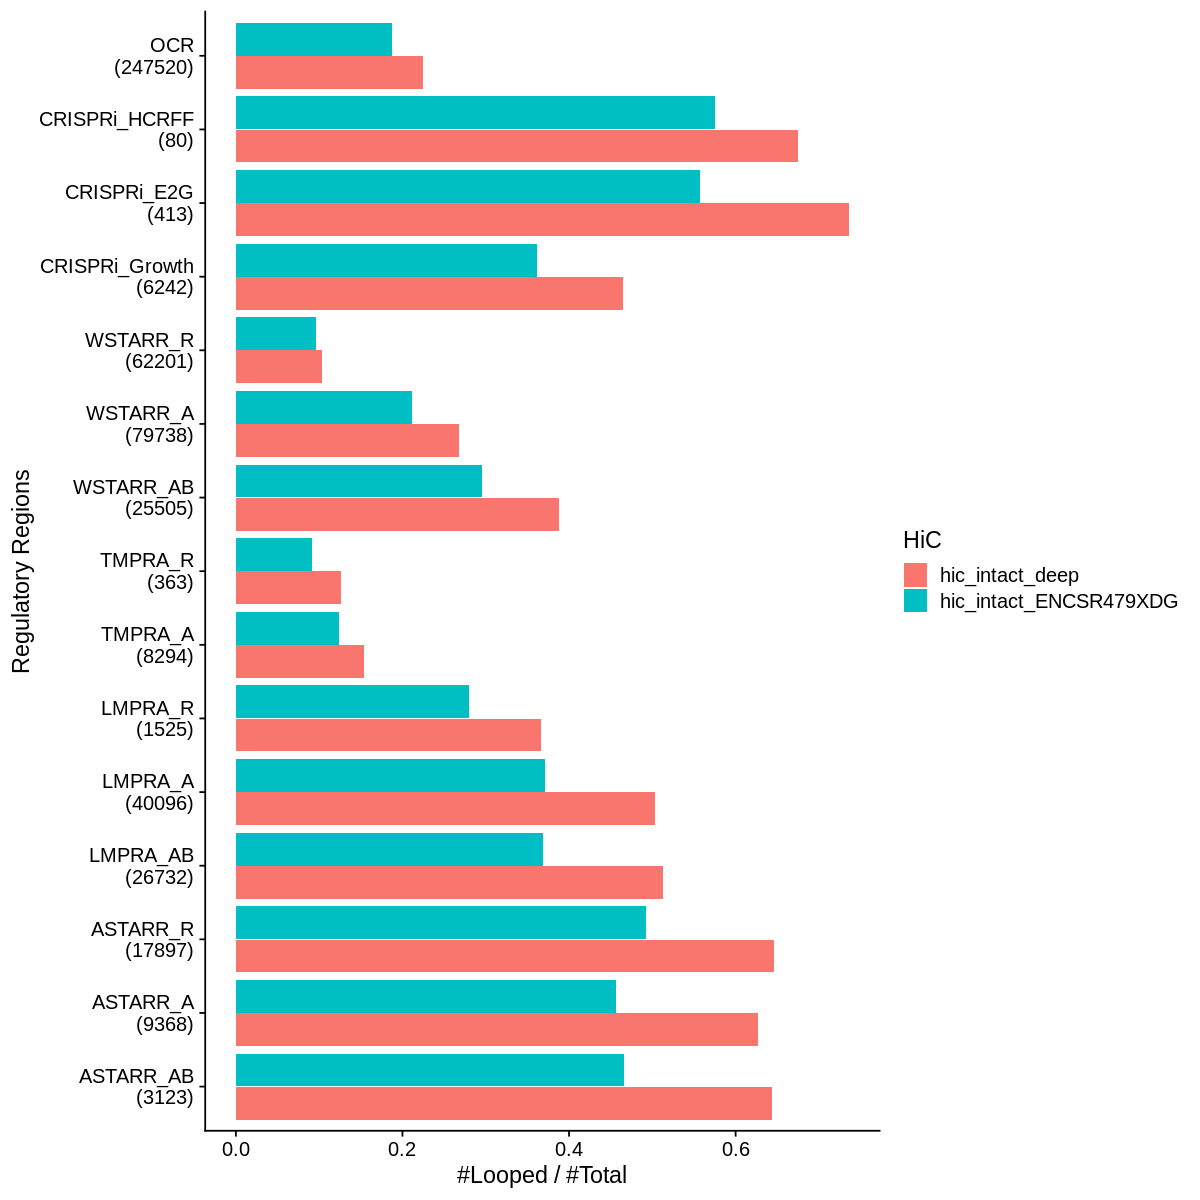

In [26]:
vec = unique(c(dat1$Assay, "CRISPRi_Growth", "CRISPRi_HCRFF", "CRISPRi_E2G", "OCR"))
dat = dat_merge %>% dplyr::filter(Assay %in% vec)
gpt = ggplot(dat, aes(x=Label, y=Freq, fill = HiC)) + 
    geom_col(position = position_dodge2(preserve = "single", padding = 0.01)) +
    labs(x="Regulatory Regions", y="#Looped / #Total") +
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

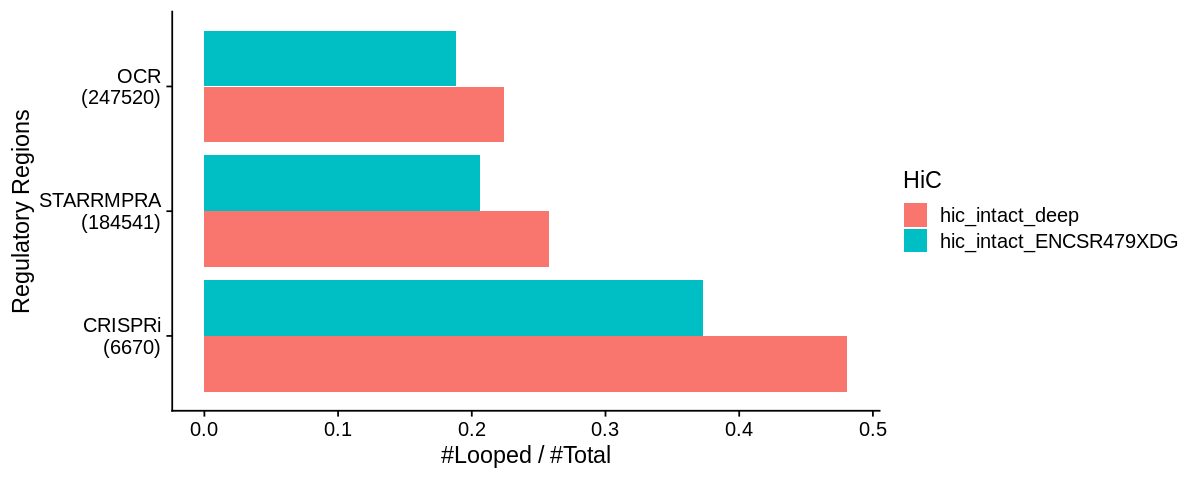

In [27]:
vec = c("CRISPRi", "STARRMPRA", "OCR")
dat = dat_merge %>% dplyr::filter(Assay %in% vec)
gpt = ggplot(dat, aes(x=Label, y=Freq, fill = HiC)) + 
    geom_col(position = position_dodge2(preserve = "single", padding = 0.01)) +
    labs(x="Regulatory Regions", y="#Looped / #Total") +
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

In [31]:
dat = bind_rows(dat1, dat2, dat3, dat4, dat5)
unique(dat$Assay)

[1] "ASTARR_AB"              "ASTARR_A"               "ASTARR_R"              
 [4] "LMPRA_AB"               "LMPRA_A"                "LMPRA_R"               
 [7] "TMPRA_A"                "TMPRA_R"                "WSTARR_AB"             
[10] "WSTARR_A"               "WSTARR_R"               "CRISPRi_Growth"        
[13] "CRISPRi_E2G"            "CRISPRi"                "CRISPRi_HCRFF"         
[16] "STARRMPRA"              "starrmpra_crispri_atac" "starrmpra_crispri"     
[19] "OCR"

In [61]:
vec = c(
    #'ASTARR_AB',
    'ASTARR_A',
    #'ASTARR_R',
    #'LMPRA_AB',
    'LMPRA_A',
    #'LMPRA_R',
    'TMPRA_A',
    #'TMPRA_R',
    #'WSTARR_AB',
    'WSTARR_A',
    #'WSTARR_R',
    'CRISPRi_Growth',
    'CRISPRi_E2G',
    #'CRISPRi',
    'CRISPRi_HCRFF',
    #'STARRMPRA',
    #'starrmpra_crispri_atac',
    #'starrmpra_crispri',
    'OCR')
dat = bind_rows(dat1, dat2, dat3, dat4, dat5)
dat = dat %>% 
    dplyr::filter(Assay %in% vec) %>%
    dplyr::filter(HiC == "hic_intact_deep")

dat = dat %>%
    dplyr::mutate(
        Assay = recode(
            Assay, 
            'ASTARR_A' = 'ASTARR',
            'LMPRA_A'  = 'LMPRA',
            'TMPRA_A'  = 'TMPRA',
            'WSTARR_A' = 'WSTARR',
            'OCR'      = 'ATAC'
        )
    )

dat  = dat %>% dplyr::mutate(Label = paste0(Assay, "\n(", Region_Total, ")"))

lab = unique(dat$Label)
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=lab))

dat_merge = dat
dat

HiC,Annotation,Region_Total,Region_Looped,Check,Freq,Assay,Label
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<fct>
hic_intact_deep,enhancer_zscore_junke.peak.ASTARR_A.bed.gz,9368,5869,5869,0.6264944,ASTARR,ASTARR (9368)
hic_intact_deep,enhancer_zscore_junke.peak.LMPRA_A.bed.gz,40096,20186,20186,0.5034417,LMPRA,LMPRA (40096)
hic_intact_deep,enhancer_zscore_junke.peak.TMPRA_A.bed.gz,8294,1278,1278,0.1540873,TMPRA,TMPRA (8294)
hic_intact_deep,enhancer_zscore_junke.peak.WSTARR_A.bed.gz,79738,21356,21356,0.2678271,WSTARR,WSTARR (79738)
hic_intact_deep,crispri_growth_dhs.bed.gz,6242,2902,2902,0.4649151,CRISPRi_Growth,CRISPRi_Growth (6242)
hic_intact_deep,crispri_e2g_region.bed.gz,413,304,304,0.7360775,CRISPRi_E2G,CRISPRi_E2G (413)
hic_intact_deep,enhancer_merge.region.crispri_hcrff.bed.gz,80,54,54,0.6750000,CRISPRi_HCRFF,CRISPRi_HCRFF (80)
hic_intact_deep,KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz,247520,55551,55551,0.2244303,ATAC,ATAC (247520)


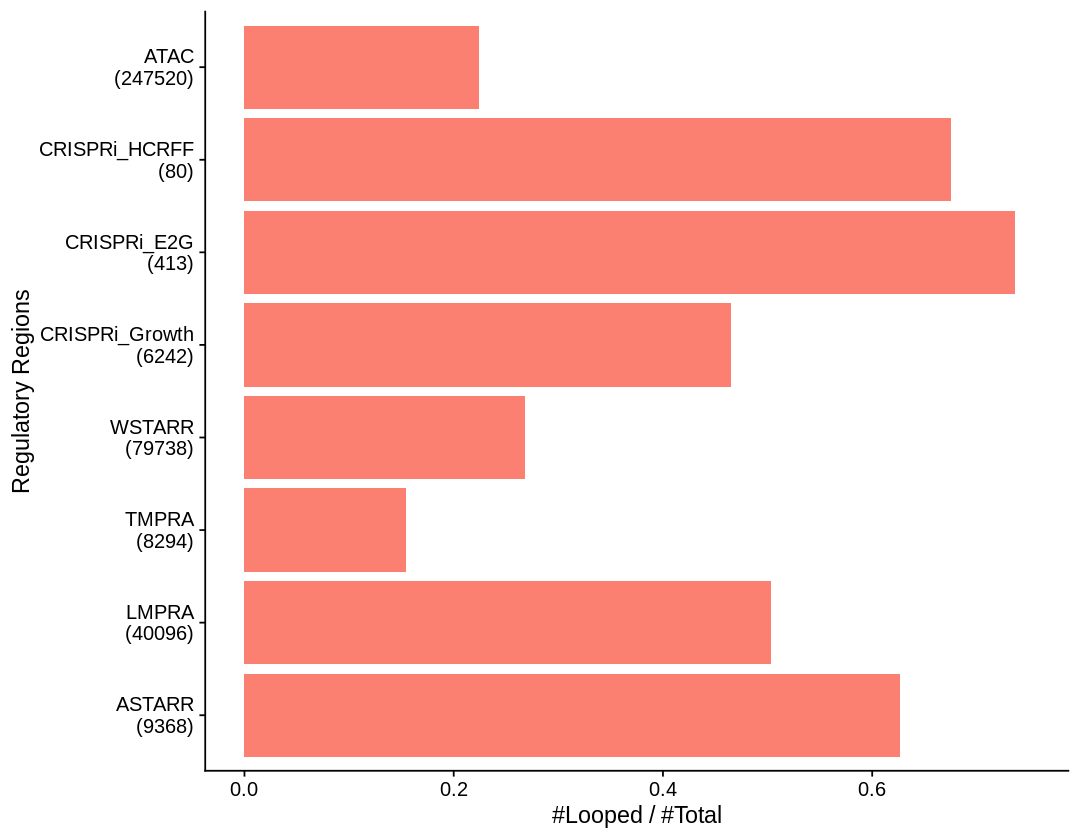

In [62]:
gpt = ggplot(dat, aes(x=Label, y=Freq)) + 
    geom_col(position = position_dodge2(preserve = "single", padding = 0.01), fill = "#fb8072") +
    labs(x="Regulatory Regions", y="#Looped / #Total") +
    ylim(c(0, 0.75)) +
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=7, repr.plot.width=9)
print(gpt)

In [63]:
vec = c(
    #'ASTARR_AB',
    #'ASTARR_A',
    #'ASTARR_R',
    #'LMPRA_AB',
    #'LMPRA_A',
    #'LMPRA_R',
    #'TMPRA_A',
    #'TMPRA_R',
    #'WSTARR_AB',
    #'WSTARR_A',
    #'WSTARR_R',
    #'CRISPRi_Growth',
    #'CRISPRi_E2G',
    'CRISPRi',
    #'CRISPRi_HCRFF',
    'STARRMPRA',
    #'starrmpra_crispri_atac',
    #'starrmpra_crispri',
    'OCR')
dat = bind_rows(dat1, dat2, dat3, dat4, dat5)
dat = dat %>% 
    dplyr::filter(Assay %in% vec) %>%
    dplyr::filter(HiC == "hic_intact_deep")

dat = dat %>%
    dplyr::mutate(
        Assay = recode(
            Assay, 
            'ASTARR_A' = 'ASTARR',
            'LMPRA_A'  = 'LMPRA',
            'TMPRA_A'  = 'TMPRA',
            'WSTARR_A' = 'WSTARR',
            'OCR'      = 'ATAC'
        )
    )

dat  = dat %>% dplyr::mutate(Label = paste0(Assay, "\n(", Region_Total, ")"))

lab = unique(dat$Label)
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=lab))

dat_merge = dat
dat

HiC,Annotation,Region_Total,Region_Looped,Check,Freq,Assay,Label
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<fct>
hic_intact_deep,enhancer_merge.region.crispri.bed.gz,6670,3208,3208,0.4809595,CRISPRi,CRISPRi (6670)
hic_intact_deep,enhancer_merge.region.starrmpra.bed.gz,184541,47574,47574,0.2577964,STARRMPRA,STARRMPRA (184541)
hic_intact_deep,KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz,247520,55551,55551,0.2244303,ATAC,ATAC (247520)


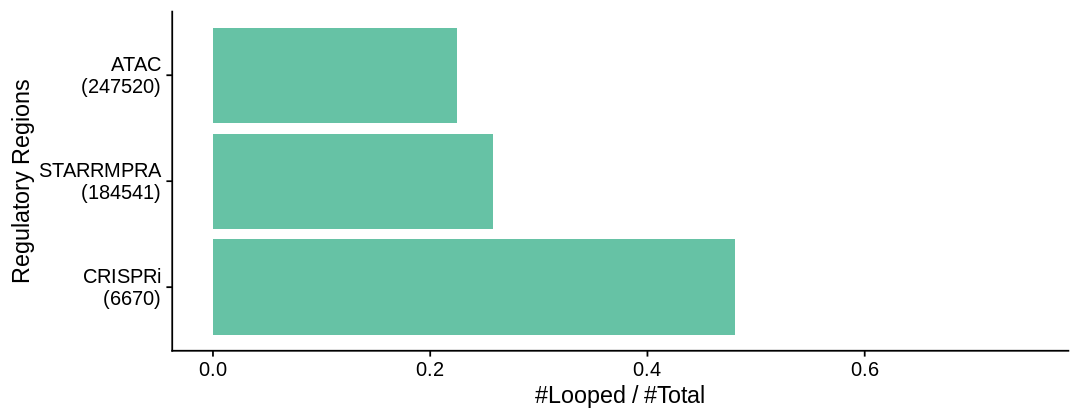

In [66]:
gpt = ggplot(dat, aes(x=Label, y=Freq)) + 
    geom_col(position = position_dodge2(preserve = "single", padding = 0.01), fill="#66c2a5") +
    labs(x="Regulatory Regions", y="#Looped / #Total") +
    ylim(c(0, 0.75)) +
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=3.5, repr.plot.width=9)
print(gpt)